**Наблюдение:**

В файле с прототипами вероятностей небольшая ошибка, которая немного сбивает с толку:
```
# all other parameters - values of the conditions (variables a, b, c, d).
#                        Numpy vectors of size (k,), where k is an arbitrary number.
#                        For variant 3: c and d must be numpy arrays of size (k,N),
#                        where N is a number of lectures.
```

На самом деле в любом варианте функция `pd_c` в качестве `c` принимает вектор размера `(k, )`

In [62]:
from IPython.display import HTML
 
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Для скрытия/раскрытия кода нажмите <a href="javascript:code_toggle()">здесь</a>.''')

# Описание

Рассмотрим модель посещаемости студентами ВУЗа одной лекции по курсу. Пусть аудитория данного курса состоит из студентов профильного факультета, а также студентов других факультетов. Обозначим через $a$ количество студентов, поступивших на профильный факультет, а через $b$ - количество студентов других факультетов. Пусть студенты профильного факультета посещают лекцию с некоторой вероятностью $p_1$, а студенты остальных факультетов – с вероятностью $p_2$. Обозначим через $c$ количество студентов, посетивших данную лекцию. Тогда случайная величина $c|a,b$ есть сумма двух случайных величин, распределённых по биномиальному закону $Bin(a,p_1)$ и $Bin(b,p_2)$ соответственно. Пусть далее на лекции по курсу ведётся запись студентов. При этом каждый студент записывается сам, а также, быть может, записывает своего товарища, которого на лекции на самом деле нет. Пусть студент записывает своего товарища с некоторой вероятностью $p_3$. Обозначим через $d$ общее количество записавшихся на данной лекции. Тогда случайная величина $d|c$ представляет собой сумму $c$ и случайной величины, распределённой по биномиальному закону $Bin(c,p_3)$. Для завершения задания вероятностной модели осталось определить априорные вероятности для $a$ и для $b$. Пусть обе эти величины распределены равномерно в своих интервалах $[a_{min},a_{max}]$ и $[b_{min},b_{max}]$ (дискретное равномерное распределение). Таким образом, мы определили следующую вероятностную модель (1):

\begin{align}
    &p(a,b,c,d) = p(d|c)p(c|a,b)p(a)p(b),\notag\\
    &d|c \sim c+Bin(c,p_3),\notag\\
    &c|a,b \sim Bin(a,p_1) + Bin(b,p_2),\label{eq:model1}\\
    &a \sim Unif[a_{min},a_{max}],\notag\\
    &b \sim Unif[b_{min},b_{max}].\notag
\end{align}

Рассмотрим несколько упрощённую версию модели. Известно, что биномиальное распределение $Bin(n,p)$ при большом количестве испытаний и маленькой вероятности успеха может быть с высокой точностью приближено пуассоновским распределением $Poiss(\lambda)$ с $\lambda = np$. Известно также, что сумма двух пуассоновских распределений с параметрами $\lambda_1$ и $\lambda_2$ есть пуассоновское распределение с параметром $\lambda_1+\lambda_2$ (для биномиальных распределений это неверно). Таким образом, мы можем сформулировать вероятностную модель (2), которая является приближённой версией модели:
\begin{align}
    &p(a,b,c,d) = p(d|c)p(c|a,b)p(a)p(b),\notag\\
    &d|c \sim c+Bin(c,p_3),\notag\\
    &c|a,b \sim Poiss(ap_1+bp_2),\label{eq:model2}\\
    &a \sim Unif[a_{min},a_{max}],\notag\\
    &b \sim Unif[b_{min},b_{max}].\notag
\end{align}

Рассмотрим теперь модель посещений нескольких лекций курса. Будем считать, что посещения отдельных лекций являются независимыми. Тогда модель (3):

\begin{align}
    &p(a,b,c_1,\dots,c_N,d_1,\dots,d_N) = p(a)p(b)\prod_{n=1}^Np(d_n|c_n)p(c_n|a,b),\notag\\
    &d_n|c_n \sim c_n + Bin(c_n,p_3),\notag\\
    &c_n|a,b \sim Bin(a,p_1) + Bin(b,p_2),\label{eq:model3}\\
    &a \sim Unif[a_{min},a_{max}],\notag\\
    &b \sim Unif[b_{min},b_{max}].\notag
\end{align}

Теперь можно сформулировать упрощённую модель (4):
\begin{align}
    &p(a,b,c_1,\dots,c_N,d_1,\dots,d_N) = p(a)p(b)\prod_{n=1}^Np(d_n|c_n)p(c_n|a,b),\notag\\
    &d_n|c_n \sim c_n + Bin(c_n,p_3),\notag\\
    &c_n|a,b \sim Poiss(ap_1+bp_2),\label{eq:model4}\\
    &a \sim Unif[a_{min},a_{max}],\notag\\
    &b \sim Unif[b_{min},b_{max}].\notag
\end{align}


## Вариант 3 (Aleksey)

Рассматриваются модели (3) и (4) с параметрами $a_{min}=75$, $a_{max}=90$, $b_{min}=500$, $b_{max}=600$, $p_1 = 0.1$, $p_2 = 0.01$, $p_3 = 0.3$, $N = 50$. Провести cледующие исследования для обеих моделей:



1. Вывести формулы для всех необходимых далее распределений аналитически.
2. Найти математические ожидания и дисперсии априорных распределений $p(a)$, $p(b)$, $p(c_n)$, $p(d_n)$.
3. Реализовать генератор выборки $d_1,\dots,d_N$ из модели при заданных значениях параметров $a,b$.
4. Пронаблюдать, как происходит уточнение прогноза для величины $b$ по мере прихода новой косвенной информации. Для этого построить графики и найти мат.ожидание и дисперсию для распределений $p(b)$, $p(b|d_1), \dots, p(b|d_1,\dots,d_N)$, где выборка $d_1,\dots,d_N$ 1) сгенерирована из модели при параметрах $a,b$, равных мат.ожиданиям своих априорных распределений, округленных до ближайшего целого и 2) $d_1=\dots=d_N$, где $d_n$ равно мат.ожиданию своего априорного распределения, округленного до ближайшего целого. Провести аналогичный эксперимент, если дополнительно известно значение $a$. Сравнить результаты двух экспериментов.
5. Провести временные замеры по оценке всех необходимых распределений $p(c_n)$, $p(d_n)$, $p(b|d_1,\dots,d_n)$, $p(b|a,d_1,\dots,d_n)$.
6. Используя результаты всех предыдущих пунктов, сравнить  две модели. Показать где максимально проявляется разница между ними (привести конкретный пример, не обязательно из экспериментов выше). Объяснить причины подобного результата.

Взять в качестве диапазона допустимых значений для величины $c$ интервал $[0,a_{max}+b_{max}]$, а для величины $d$~-- интервал $[0,2(a_{max}+b_{max})]$.

# Решение

In [52]:
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import randint, binom, poisson

from prototypes import pa, pb, pc_ab, pc, pd_c, pd, pd_ab, pd_a, pd_a, pb_d, pb_ad, generate
from roman_gorb_v2 import pc as gt_pc, pb_d as gt_pb_d, pb_ad as gt_pb_ad, pc_ab as gt_pc_ab
params = dict(
    amin=75,
    amax=90,
    bmin=500,
    bmax=600,
    p1=0.1,
    p2=0.01,
    p3=0.3,
    N=50
)
# params = dict(
#     amin=5,
#     amax=10,
#     bmin=10,
#     bmax=11,
#     p1=0.2,
#     p2=0.3,
#     p3=0.4,
#     N=30
# )

## Вывод формул

Выведем формулы для распределения, математического ожидания и дисперсии

* $a$ в обоих моделях

> Распределение


$$
P(a=x) = \frac{1}{a_\max - a_\min + 1}
$$


> М.о.

$$
Ea = \frac{a_\min + a_\max}{2} = 82.5
$$

In [35]:
Ea = (params["amin"] + params["amax"]) / 2
print(f"Ea = {Ea}")

Ea = 82.5


> Дисперсия

$$
Da = \frac{(a_\max - a_\min+1)^2 - 1}{12} = 21.25
$$

In [36]:
Da = ((params["amax"] - params["amin"] + 1)**2 - 1) / 12
print(f"Da = {Da}")

Da = 21.25


* $b$ в обоих моделях

> Распределение


$$
P(b=x) = \frac{1}{b_\max - b_\min + 1}
$$


> М.о.

$$
Eb = \frac{b_\min + b_\max}{2} = 550
$$

In [37]:
Eb = (params["bmin"] + params["bmax"]) / 2
print(f"Eb = {Eb}")

Eb = 550.0


> Дисперсия

$$
Da = \frac{(b_\max - b_\min + 1)^2 - 1}{12} = 850
$$

In [45]:
Db = ((params["bmax"] - params["bmin"] + 1)**2-1) / 12
print(f"Db = {Db}")

Db = 850.0


* $c_n$ в модели (3)

> Распределение

$$
p(c_n=k)
=
\sum\limits_{\hat a=a_\min}^{a^\max}
    \sum\limits_{\hat b=b_\min}^{b^\max}
        \sum\limits_{i=0}^{k}
            P(Bin(\hat a, p_1) = i)
            \cdot
            P(Bin(\hat b, p_2) = k-i)
            \cdot
            P(a = \hat a)
            \cdot
            P(b = \hat b)
$$

> М.о.

$$
Ec_n
=
E_{a, b}
E(c_n|a, b)
=
E_{a, b}
\left(
    EBin(a, p_1)
    +
    EBin(b, p_2)
\right)
=
E_{a, b}
\left(
    ap_1
    +
    bp_2
\right)
=
p_1E_aa
+
p_2E_bb
= 13.75
$$

In [46]:
Ec_n = params["p1"] * Ea +\
    params["p2"] * Eb
print(f"Ec_n = {Ec_n}")

Ec_n = 13.75


> Дисперсия

$$
Dc_n
=
E_{a, b}
D(c_n|a, b)
+
D_{a, b}
E(c_n|a, b)
=
E_{a, b}
\left(
    DBin(a, p_1)
    +
    DBin(b, p_2)
\right)
+
D_{a, b}
\left(
    ap_1
    +
    bp_2
\right)
=
E_{a, b}
\left(
    ap_1(1-p_1)
    +
    bp_2(1-p_2)
\right)
+
p_1^2 D_{a}a
+
p_2^2 D_b b
=
p_1(1-p_1) E_aa
+
p_2(1-p_2) E_bb
+
p_1^2 D_aa
+
p_2^2 D_bb
= 13.17
$$

In [47]:
Dc_n = params["p1"] * (1 - params["p1"]) * Ea +\
    params["p2"] * (1-params["p2"])* Eb + params["p1"]**2 * Da + params["p2"]**2 * Db
print(f"Dc_n = {Dc_n}")

Dc_n = 13.167500000000002


* $c_n$ в модели (4)

> Распределение

$$
P(c_n=k)
=
\sum\limits_{\hat a=a_\min}^{a^\max}
    \sum\limits_{\hat b=b_\min}^{b^\max}
        P(Poiss(\hat{a}p_1+\hat{b}p_2)=k)
        \cdot
        P(a = \hat a)
        \cdot
        P(b = \hat b)
$$

> М.о.

$$
Ec_n
=
E_{a, b}
E(c_n|a, b)
=
E_{a, b}
\left(
    EPoiss(ap_1+bp_2)
\right)
=
E_{a, b}
\left(
    ap_1
    +
    bp_2
\right)
=
p_1E_aa
+
p_2E_bb
= 13.75
$$

In [50]:
Ec_n_4 = params["p1"] * Ea +\
    params["p2"] * Eb
print(f"Ec_n = {Ec_n_4}")

Ec_n = 13.75


> Дисперсия

$$
Dc_n
=
E_{a, b}
D(c_n|a, b)
+
D_{a, b}
E(c_n|a, b)
=
E_{a, b}
\left(
    DPoiss(ap_1+bp_2)
\right)
+
D_{a, b}
\left(
    ap_1
    +
    bp_2
\right)
=
E_{a, b}
\left(
    ap_1
    +
    bp_2
\right)
+
p_1^2 D_{a}a
+
p_2^2 D_b b
=
p_1 E_aa
+
p_2 E_bb
+
p_1^2 D_aa
+
p_2^2 D_bb
= 14.05
$$

In [49]:
Dc_n_4 = params["p1"] * Ea +\
    params["p2"] * Eb + params["p1"]**2 * Da +\
    params["p2"] ** 2 * Db
print(f"Dc_n = {Dc_n_4}")

Dc_n = 14.047500000000001


* $d_n$

> Распределение

$$
P(d_n=k)
=
\sum\limits_{\hat{c} = 0}^{a_\max+b_\max}P(c=\hat{c})\cdot P(Bin(\hat{c}, p_3)=k-\hat{c})
$$

> М.о.

$$
Ed_n
=
E_{c_n}
E(d_n|c_n)
=
E_{c_n}
\left(
    c_n
    +   
    p_3 
    c_n
\right)
=
\left(
    1
    +   
    p_3
\right)
E_{c_n}
c_n
$$

In [51]:
Ed_n_3 = (1 + params["p3"]) * Ec_n
print(f"Ed_n в модели (3)= {Ed_n_3}")

Ed_n в модели (3)= 17.875


In [52]:
Ed_n_4 = (1 + params["p3"]) * Ec_n_4
print(f"Ed_n в модели (4)= {Ed_n_4}")

Ed_n в модели (4)= 17.875


> Дисперсия

$$
Dd_n
=
E_{c_n}
D(d_n|c_n)
+
D_{c_n}
E(d_n|c_n)
=
E_{c_n}
\left(
    c_n
    p_3
    (1-p_3)
\right)
+
D_{c_n}
\left(
    (1+p_3)
    c_n
\right)
=
p_3
(1-p_3)
E_{c_n}c_n
+
(1+p_3)^2
D_{c_n}
c_n
$$

In [53]:
Dd_n_3 = params["p3"] * (1-params["p3"]) * Ec_n + (1 + params["p3"]) ** 2 * Dc_n
print(f"Dd_n в модели (3) = {Dd_n_3}")

Dd_n в модели (3) = 25.140575000000005


In [54]:
Dd_n_4 = params["p3"] * (1-params["p3"]) * Ec_n_4 + (1 + params["p3"]) ** 2 * Dc_n_4
print(f"Dd_n в модели (4) = {Dd_n_4}")

Dd_n в модели (4) = 26.627775000000003


* $d_i|a, b$

> Распределение

$$
P(d_i=k|a, b)
=
\sum
\limits_{\hat{c}=0}^{a_\max+b_\max}
    P(d_i=k|c_i=\hat{c})
    P(c_i=\hat{c}|a, b)
$$

* $d_i|a$

> Распределение

$$
P(d_i=k|a)
=
\sum
\limits_{\hat{b}=b_\min}^{b_\max}
    P(d_i=k|a, b=\hat{b})
    P(b=\hat{b})
$$

* $b|a, \vec{d}$

> Распределение

$$
P(b=k|a, \vec{d})
=
\frac{
    P(\vec{d}|a, b=k)P(b=k|a)
}
{
    P(\vec{d}|a)
}
=
\frac{
    P(\vec{d}|a, b=k)P(b=k)
}
{
    P(\vec{d}|a)
}
=
\frac{
    \prod
    \limits_{i=1}^N
        P(d_i|a, b=k)P(b=k)
}
{
    \prod
    \limits_{i=1}^N
        P(d_i|a)
}
$$

* $b | \vec{d}$

> Распределение

$$
P(b=k|\vec{d})
=
\sum
\limits_{\hat{a}=a_\min}^{a_\max}
    P(b=k|a=\hat{a}, \vec{d})
    P(a=\hat{a})
$$

$$
P(b=k|\vec{d})
=
\frac{
    \sum
    \limits_{\hat{a}=a_\min}^{a_\max}
        P(\vec{d}|a=\hat{a}, b=k)
        P(a=\hat{a})
}
{
NormConst(\vec{d})
}
=
\frac{
    \sum
    \limits_{\hat{a}=a_\min}^{a_\max}
        P(\vec{d}|a=\hat{a}, b=k)
}
{
NormConst(\vec{d})
}
$$

## Эксперименты

### 4.a Уточнение прогноза для величины $𝑏$ при помощи $d_1, \dots, d_N$

Построить графики и найти мат.ожидание и дисперсию для распределений $p(b)$, $p(b|d_1), \dots, p(b|d_1,\dots,d_N)$.
Проведём этот эксперимент для 3 модели

In [26]:
params = dict(
    amin=5,
    amax=10,
    bmin=10,
    bmax=11,
    p1=0.2,
    p2=0.3,
    p3=0.4,
    N=30
)

In [59]:
def visualize_probs(b_probs, b_values, use_a=False):
    a_str = "a," if use_a else ""
    N = b_probs.shape[0]
    alphas = np.linspace(0.1, 1, N)
    b_values = b_values.flatten()

    # Подсчёт мат. ожидания и дисперсии
    expected = np.sum(b_probs * b_values, axis=1).flatten()
    var = np.sum((expected[:, None] - b_values) ** 2 * b_probs, axis=1).flatten()

    # Построение графиков
    f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(13, 3*7))


    # Построение сходящихся плотностей
    ax1.set_xlabel("b")
    
    ax1.plot(
        b_values,
        b_probs[0, :],
        alpha=1,
        color='green',
        label=r'$p(b|a)$' if use_a else r'$p(b)$'
    )
    ax1.plot(
        b_values,
        b_probs[N-1, :],
        alpha=1,
        color='red',
        label=r'$p(b|a, d_1, \cdots, d_N)$' if use_a else r'$p(b|d_1, \cdots, d_N)$'
    )
    for i, (p_b, alpha) in enumerate(zip(b_probs,  alphas)):
        if i == 0 or i == N - 1:
            continue
        ax1.plot(b_values, p_b, alpha=alpha, color='brown')

    ax1.legend()

    # Построение мат. ожидания
    ax2.set_xlabel("i")
    ax2.plot(
        np.arange(1, N),
        expected[1:],
        color='brown',
        label=r'Математическое ожидание $(b|a, d_1), \cdots, (b| a, d_1, \cdots, d_i)$' if use_a else r'Математическое ожидание $(b|d_1), \cdots, (b| d_1, \cdots, d_i)$'
    )
    ax2.axhline(
        y=np.round(expected[0]),
        color='red',
        alpha=0.8,
        label=r'Мат. ожидание $b|a$' if use_a else r'Мат. ожидание $b$'
    )

    ax2.legend()
    
    # Построение дисперсии
    ax3.set_xlabel("i")
    ax3.plot(
        np.arange(1, N),
        var[1:],
        color='green',
        label=r'Дисперсия $(b|a, d_1), \cdots, (b| a, d_1, \cdots, d_i)$' if use_a else r'Дисперсия $(b|d_1), \cdots, (b| d_1, \cdots, d_i)$'
    )
    ax3.axhline(
        np.round(var[0]),
        color='blue',
        alpha=0.8,
        label=r'Дисперсия $b|a$' if use_a else r'Дисперсия $b$'
    )

    ax3.legend()
    f.show()


def generate_d(variant, model):
    if variant == 1:
        p_a, a_values = pa(params, model)
        p_b, b_values = pb(params, model)
        expected_a = np.array(np.int(np.round(np.sum(p_a * a_values))))
        expected_b = np.array(np.int(np.round(np.sum(p_b * b_values))))
        d = generate(params["N"], expected_a, expected_b, params, model).reshape((1, -1)).astype(np.int)
    if variant == 2:
        p_d, d_values = pd(params, model)
        expected_d = np.int(np.round(np.sum(p_d * d_values)))
        d = (np.ones((1, params["N"])) * expected_d).astype(np.int)
    
    return d

def get_d_probs(d, use_a, model):
    p_a, a_values = pa(params, model)
    expected_a = np.array(np.int(np.round(np.sum(p_a * a_values)))).reshape((1, 1))
    b_probs = []
    b_values = None

    for i in range(d.shape[1] + 1):
        if i:
            d_slice = d[:, :(i - 1)]
            if use_a:
                b_prob, b_values = pb_ad(expected_a, d_slice, params, model)
            else:
                b_prob, b_values = pb_d(d_slice, params, model)
            b_prob = b_prob.flatten()
        else:
            b_prob, b_values = pb(params, 3)

        b_probs.append(b_prob)

    b_probs = np.array(b_probs)
    b_values = b_values.reshape((1, -1))
    return b_probs, b_values

def experiment_4(use_a, is_d_generated, model):
    d = generate_d(1, model) if is_d_generated else generate_d(2, model)

    b_probs, b_values = get_d_probs(d, use_a, model)
    
    visualize_probs(b_probs, b_values)

> Выборка  $d_1, \dots, d_N$ сгенерирована из модели при параметрах  $𝑎$, $𝑏$, равных мат.ожиданиям своих априорных распределений, округленных до ближайшего целого

/Users/alex-kozinov/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


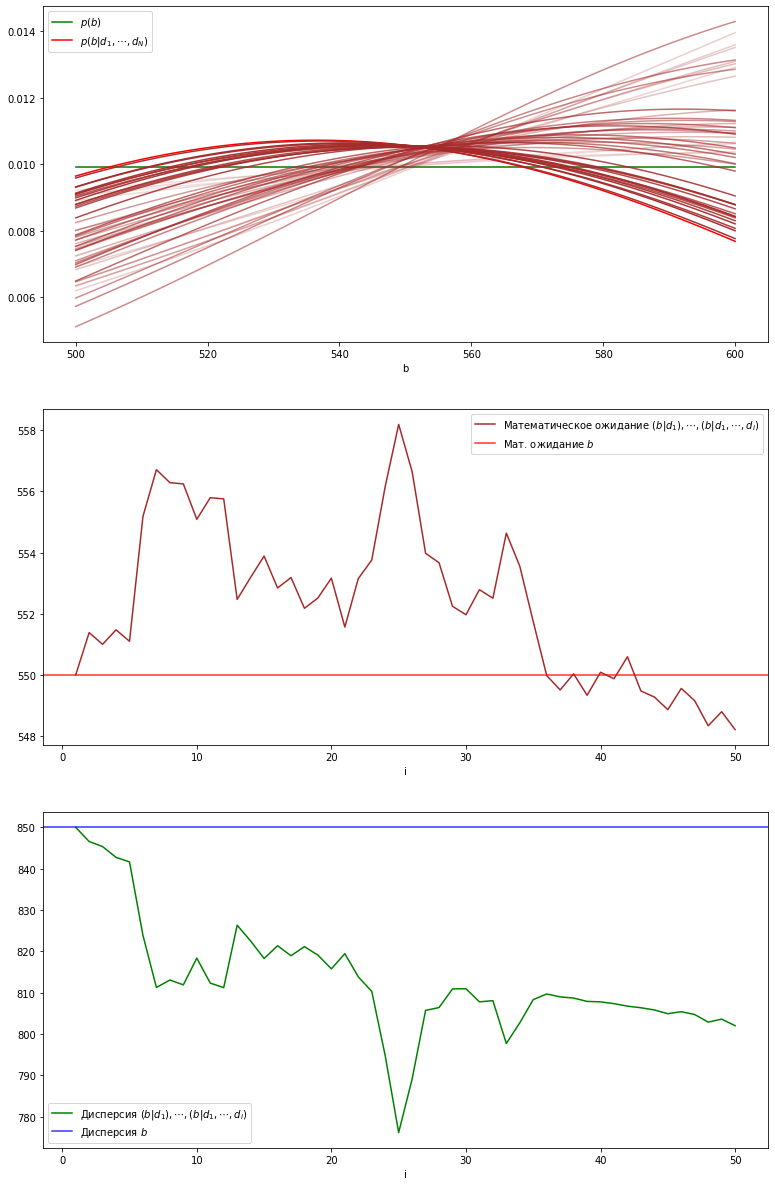

In [56]:
experiment_4(False, True, 3)

> $d_1=\dots=d_N$, где $d_n$ равно мат.ожиданию своего априорного распределения, округленного до ближайшего целого.

/Users/alex-kozinov/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


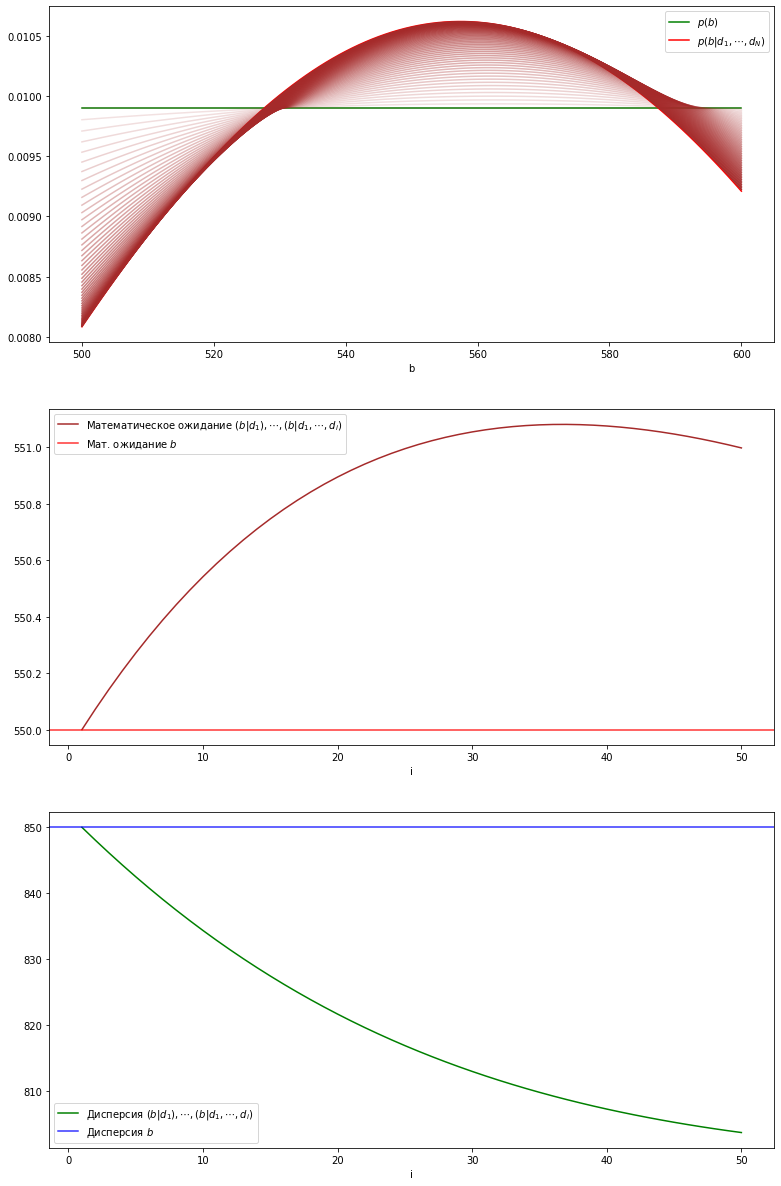

In [54]:
experiment_4(False, False, 3)

**Выводы:**

- Во втором случае плотность приближается более плавно к истинному значению $b=550$
- Математическое ожидание во втором случае не равняется $550$ из-за округления $d_n$
- Дисперсия во втором случае также плавно уменьшается, так как в выборке $d_1, \cdots, d_n$ нет выбросов
- В первом случае можно заметить, что мы не сразу угадываем истинное значение $b$, и при небольшом размере выборки $d$ мода плотности находится при других значениях
- Но при этом при росте размера выборки, м.о. $b|d_1, \cdots, d_n$ приближается к истинному
- Также в первом случае постепенно уменьшается дисперсия. Мы становимся всё более уверенны в выборе истинного значения $b$


### 4.b Уточнение прогноза для величины $𝑏$ при помощи $a, d_1, \dots, d_N$

Построить графики и найти мат.ожидание и дисперсию для распределений $p(b|a)$, $p(b|a, d_1), \dots, p(b|a, d_1,\dots,d_N)$.
Проведём этот эксперимент для 3 модели

> Выборка  $d_1, \dots, d_N$ сгенерирована из модели при параметрах  $𝑎$, $𝑏$, равных мат.ожиданиям своих априорных распределений, округленных до ближайшего целого

/Users/alex-kozinov/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:72: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


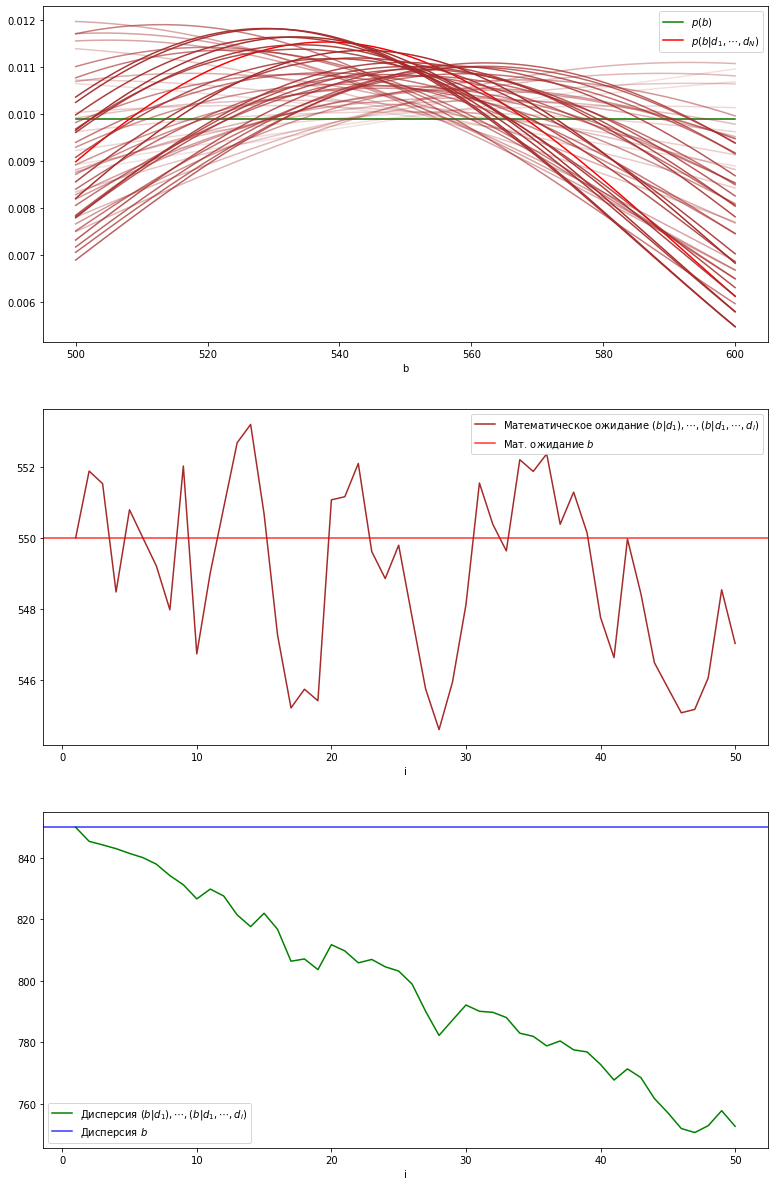

In [60]:
experiment_4(True, True, 3)

> $d_1=\dots=d_N$, где $d_n$ равно мат.ожиданию своего априорного распределения, округленного до ближайшего целого.

/Users/alex-kozinov/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:72: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


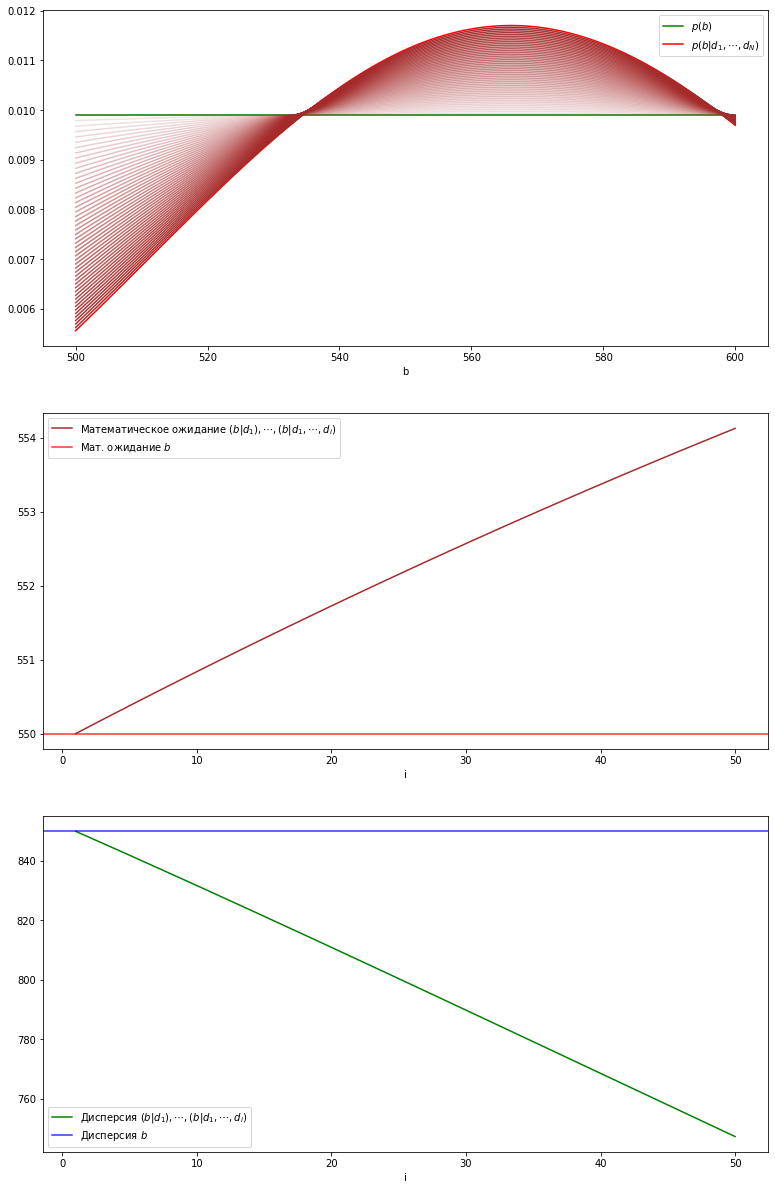

In [61]:
experiment_4(True, False, 3)

**Выводы**
* Наличие априорного значения $a$ помогает первому случаю более точно угадывать $b$
* Из-за округления априорного значения $a$ второй случай сильнее ошибкается с мат. ожиданием $b$
* В первом случае дисперсия стала более гладкой, по сравнению с предыдущим экспериментом 


### Провести временные замеры по оценке всех необходимых распределений $p(c_n)$, $p(d_n)$, $p(b|d_1,\dots,d_n)$, $p(b|a,d_1,\dots,d_n)$.

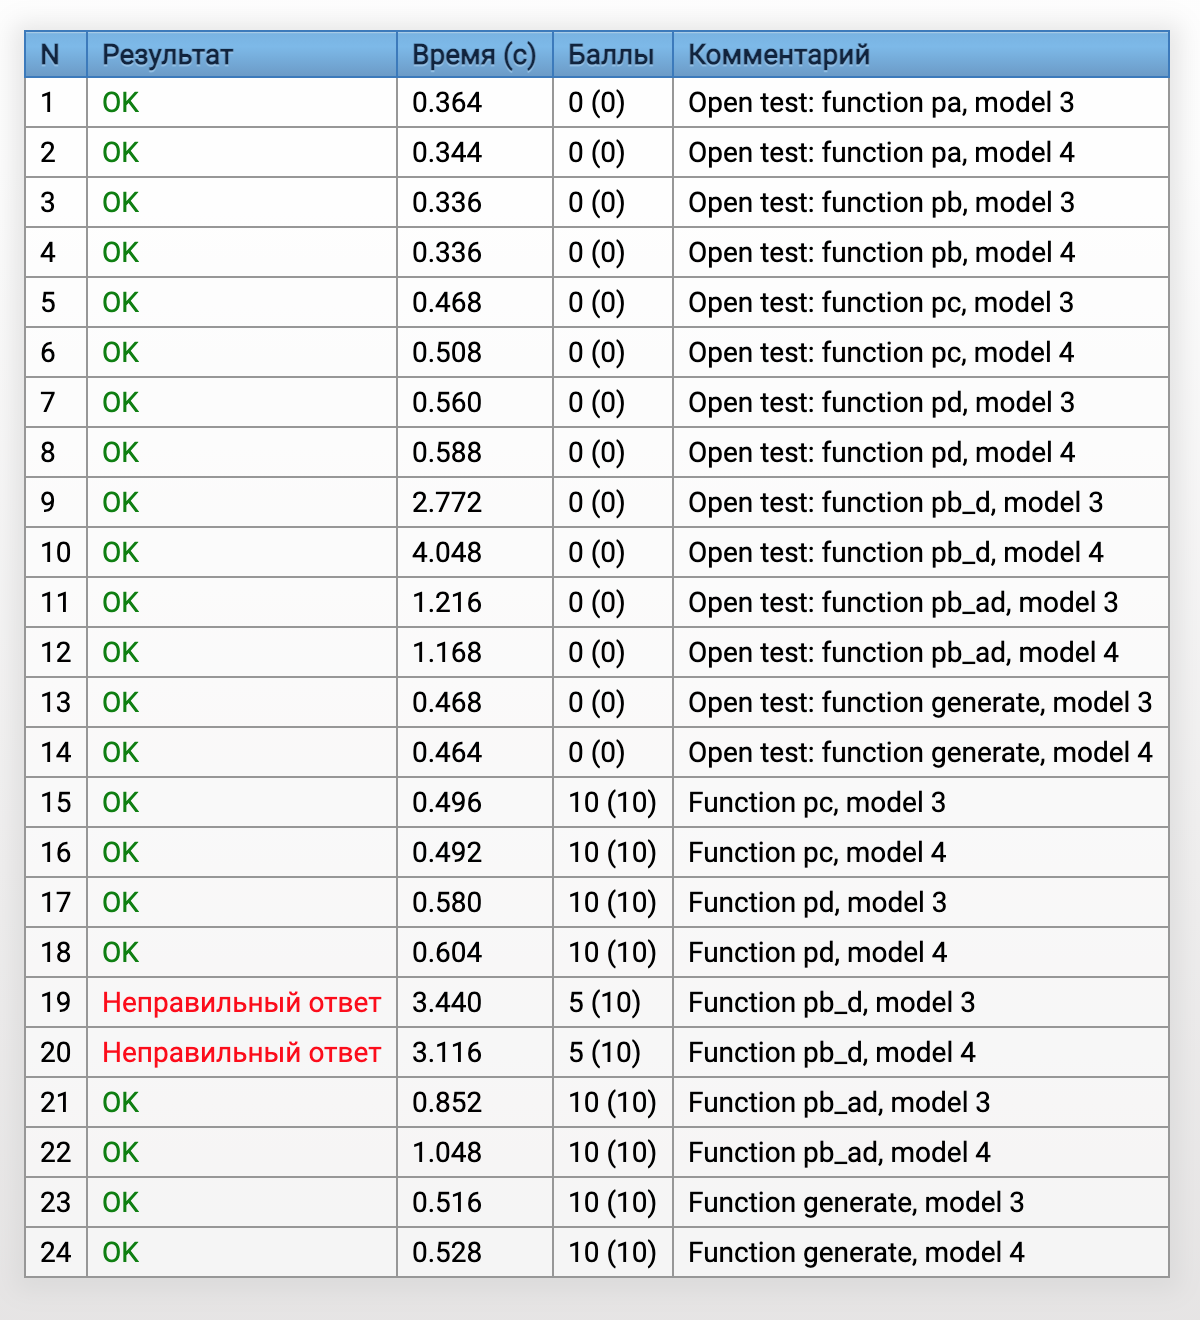

**Выводы:**
Можно заметить, что оба метода работают с сопоставимыми скоростями. Дольше всего проиходит подсчёт *p_d*